# Шаг 1: Первичный анализ данных

## Описание задачи

https://www.kaggle.com/datasets/blastchar/telco-customer-churn/

## Импорт библиотек

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option("display.max_columns", 50)
pd.options.display.max_rows = 20

import numpy as np

import seaborn as sns
sns.set_style("darkgrid")  
sns.set_context("talk", font_scale=0.6)

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update(
    {"lines.linewidth": 1, "patch.facecolor": "#ebe3df", "axes.facecolor": "#ebe3df"})

from tqdm import tqdm
from tqdm import tqdm_notebook

In [54]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [3]:
RANDOM_STATE = 2307

## Загрузка

In [4]:
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv', index_col=None)
display(df.head())
display(df.tail())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Посмотрим на сэмпл загруженных данных:

In [5]:
df.shape

(7043, 21)

**Описание данных**

**_Признаки_**

- `customerID` - Customer ID
- `gender` - Whether the customer is a male or a female
- `Senior Citizen` - Whether the customer is a senior citizen or not (1, 0)
- `Partner` - Whether the customer has a partner or not (Yes, No)
- `Dependents` - Whether the customer has dependents or not (Yes, No)
- `tenure` - Number of months the customer has stayed with the company
- `Phone Service`: - Whether the customer has a phone service or not (Yes, No)
- `Multiple Lines` - Whether the customer has multiple lines or not (Yes, No, No phone service)
- `Internet Service` - Customer’s internet service provider (DSL, Fiber optic, No)
- `Online Security` - Whether the customer has online security or not (Yes, No, No internet service)
- `Online Backup` - Whether the customer has online backup or not (Yes, No, No internet service)
- `Device Protection` - Whether the customer has device protection or not (Yes, No, No internet service)
- `Tech Support` - Whether the customer has tech support or not (Yes, No, No internet service)
- `StreamingTV` - Whether the customer has streaming TV or not (Yes, No, No internet service)
- `Streaming` - Whether the customer has streaming movies or not (Yes, No, No internet service)
- `Contract` - The contract term of the customer (Month-to-month, One year, Two year)
- `Paperless Billing` - Whether the customer has paperless billing or not (Yes, No)
- `Payment Method` - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- `Monthly Charges` - The amount charged to the customer monthly
- `Total Charges` - The total amount charged to the customer

**_Целевой признак_**
- `Churn Label` - Whether the customer churned or not (Yes or No)



**_Дополнительная информация_**
- `Customers who left within the last month` – the column is called Churn

- `Services that each customer has signed up for` – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- `Customer account information` - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- `Demographic info about customers` – gender, age range, and if they have partners and dependents

## Посмотрим на типы данных в каждом столбце и количество уникальных значений

In [9]:
# Реализовать как функцию
def display_dtypes(df):
    df_local = df
    df_tmp = df_local#[[i for i in df_local.columns if 'datetime' in i]]

    # Обзор намеков на типы признаков
    unique_values = df_tmp.nunique().sort_values(ascending=False)
    unique_values = pd.DataFrame(unique_values, columns = ['Колич. уник. значений'])

    # Довать процентовку
    unique_values['Доля уникальных в %'] = (unique_values['Колич. уник. значений']/df_tmp.shape[0])*100
    unique_values = pd.concat([unique_values, pd.DataFrame(df_tmp.dtypes, columns=['dtype'])], axis=1)
    
    for dtype in unique_values['dtype'].unique():
        display(unique_values[unique_values['dtype']==dtype])
    
display_dtypes(df)

,Колич. уник. значений,Доля уникальных в %,dtype
customerID,7043,100.000000,object
TotalCharges,6531,92.730371,object
PaymentMethod,4,0.056794,object
DeviceProtection,3,0.042595,object
Contract,3,0.042595,object
StreamingMovies,3,0.042595,object
StreamingTV,3,0.042595,object
TechSupport,3,0.042595,object
OnlineBackup,3,0.042595,object
OnlineSecurity,3,0.042595,object


,Колич. уник. значений,Доля уникальных в %,dtype
MonthlyCharges,1585,22.504615,float64


,Колич. уник. значений,Доля уникальных в %,dtype
tenure,73,1.036490,int64
SeniorCitizen,2,0.028397,int64


Нужно отметить следующее:
- `customerID` - Признак является уникальным идентификатором и не несет информационной ценнности в рамках задачи - можно; удалить
- `SeniorCitizen` - должен быть категориальным признаком. int -> object;
- `TotalCharges` - должен быть числовым признаком. object -> float.

Посмотрим на эти признаки поближе:

#### SeniorCitizen

In [10]:
display(df['SeniorCitizen'].unique())

array([0, 1], dtype=int64)

In [11]:
# Преобразование int -> object
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1:'Yes'})
display(df['SeniorCitizen'].unique())

array(['No', 'Yes'], dtype=object)

#### TotalCharges

Посмотрим на значения признака

In [12]:
display(df[['TotalCharges']].sample(10))

,TotalCharges
5962,1321.3
3865,24
6256,35.05
642,89.55
2242,1013.6
14,2686.05
4689,57.4
3447,3213.75
2704,3297
6989,1588.75


Если убрать точку, будут ли данный состоять из чисел?

In [13]:
display(df['TotalCharges'].str.replace('.','').str.isdigit().value_counts())

True     7032
False      11
Name: TotalCharges, dtype: int64

Видим, что имеются значения, которые не являются "строкой из числа"

In [14]:
cond = df['TotalCharges'].str.replace('.','').str.isdigit() == False
df[cond][['TotalCharges']]

,TotalCharges
488,
753,
936,
1082,
1340,
3331,
3826,
4380,
5218,
6670,


В признаке имеются пустые значения

In [15]:
def transform_fnc(x):
    try: 
        out = pd.to_numeric(x)
    except: 
        out = np.nan
        print(f'exception = {x}')
    
    return out

df['TotalCharges'] = df['TotalCharges'].apply(transform_fnc)

exception =  
exception =  
exception =  
exception =  
exception =  
exception =  
exception =  
exception =  
exception =  
exception =  
exception =  


#### customerID

Удалим признак

In [16]:
df.drop(columns=['customerID'], inplace=True)

Проверим, что все преобразования прошли:

In [17]:
display_dtypes(df)

,Колич. уник. значений,Доля уникальных в %,dtype
TotalCharges,6530,92.716172,float64
MonthlyCharges,1585,22.504615,float64


,Колич. уник. значений,Доля уникальных в %,dtype
tenure,73,1.03649,int64


,Колич. уник. значений,Доля уникальных в %,dtype
PaymentMethod,4,0.056794,object
DeviceProtection,3,0.042595,object
Contract,3,0.042595,object
MultipleLines,3,0.042595,object
InternetService,3,0.042595,object
OnlineSecurity,3,0.042595,object
OnlineBackup,3,0.042595,object
TechSupport,3,0.042595,object
StreamingTV,3,0.042595,object
StreamingMovies,3,0.042595,object


## Посмотрим на области значений признаков.

#### Числовые признаки.

*- Интересует адекватность области значений каждого числового признака*

In [18]:
df.describe().loc[['max', 'min']]

,tenure,MonthlyCharges,TotalCharges
max,72.0,118.75,8684.8
min,0.0,18.25,18.8


На первый взгляд значения всех признаков лежат в допустимых областях значений

#### Категориальные признаки

Количество уникальных значений в категориальных признаках не превышает 4, поэтому можем посмотреть на них все

In [19]:
def get_unique(dataframe: pd.DataFrame):
    cat_cols = dataframe.select_dtypes(exclude="number")
    uni_values = []
    counts=[]

    for col in cat_cols.columns:
        uni_value, count = np.unique(
            np.array(cat_cols[col], dtype=str), return_counts=True
        )
        uni_values.append(uni_value)
        counts.append(count)

        
    result = pd.DataFrame(
        {
            "dtype": cat_cols.dtypes,
            "unique_values": uni_values,
            "counts": [len(val) for val in uni_values],
        } )
    cm = sns.light_palette('orange', as_cmap=True)
    result = result.style.background_gradient( cmap=cm, axis=0, subset=['counts'], vmin = 3)
    
    return result

In [20]:
get_unique(df)

,dtype,unique_values,counts
gender,object,['Female' 'Male'],2
SeniorCitizen,object,['No' 'Yes'],2
Partner,object,['No' 'Yes'],2
Dependents,object,['No' 'Yes'],2
PhoneService,object,['No' 'Yes'],2
MultipleLines,object,['No' 'No phone service' 'Yes'],3
InternetService,object,['DSL' 'Fiber optic' 'No'],3
OnlineSecurity,object,['No' 'No internet service' 'Yes'],3
OnlineBackup,object,['No' 'No internet service' 'Yes'],3
DeviceProtection,object,['No' 'No internet service' 'Yes'],3


На первый взгляд все категориальные признаки лежат в допустимых областях значений

## Посмотрим на наличие большого количества пропущенных значений (дыр в данных)

In [21]:
import missingno as msno


# Процентный список пропущенных значений
def scan_miss_val(df: pd.DataFrame) -> pd.DataFrame:
    '''
    :param df:
    :return: На выходе столбец значений =(% NAN) в признаке.
    '''
    # ___init___
    miss_val_df = pd.DataFrame()
    NA_present = 0

    # Обработка каждого столбца отдельно
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        temp = pd.DataFrame([round(pct_missing * 100)], columns=['% miss'], index=[col])
        temp['cnt'] = df[col].isnull().sum()

        miss_val_df = pd.concat([miss_val_df, temp], axis=0)

        if (pct_missing != 0) & (NA_present == 0):
            NA_present = NA_present + 1

    # Построение Тепловой карты пропущенных значений
    if NA_present != 0:
        msno.matrix(df, labels=True, sort="descending")

    return miss_val_df.sort_values(by='% miss')

,% miss,cnt
gender,0,0
MonthlyCharges,0,0
PaymentMethod,0,0
PaperlessBilling,0,0
Contract,0,0
StreamingMovies,0,0
StreamingTV,0,0
TechSupport,0,0
DeviceProtection,0,0
OnlineBackup,0,0


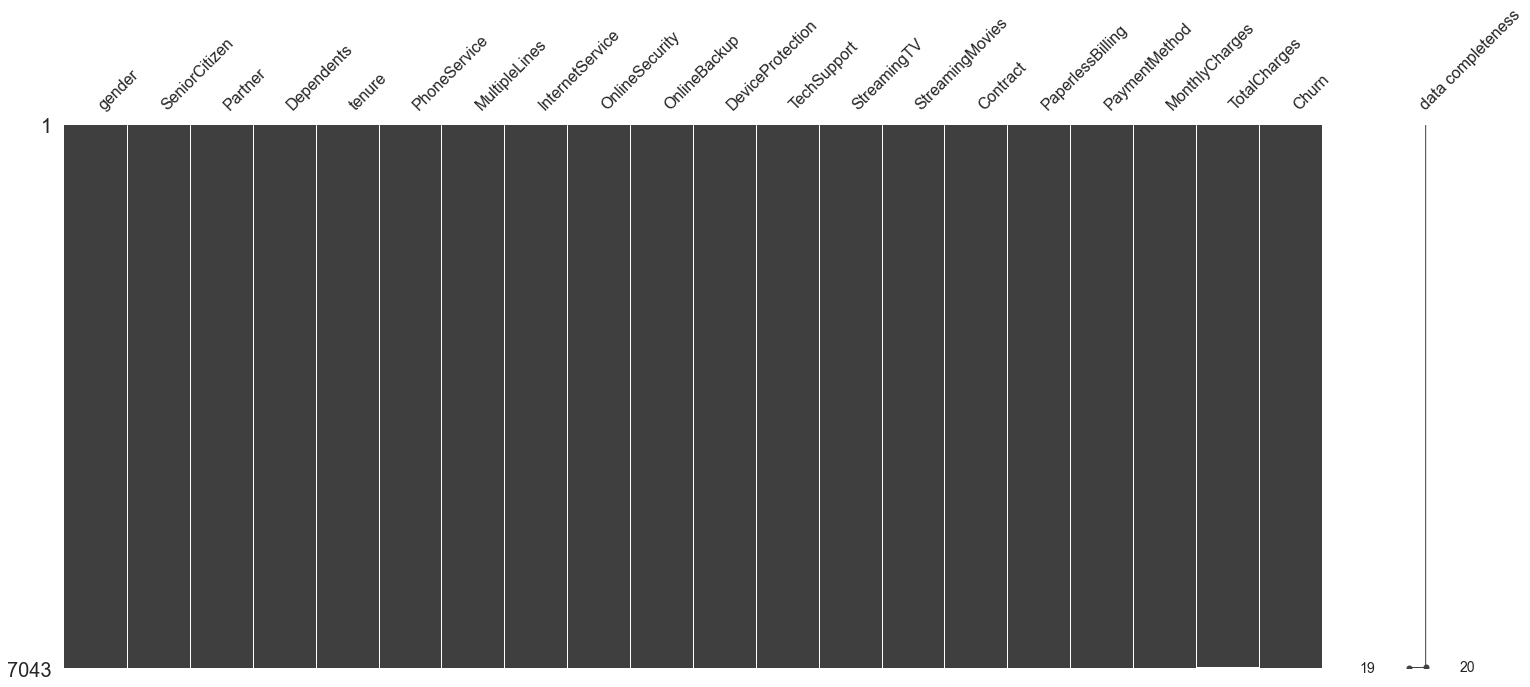

In [22]:
scan_miss_val(df)

- Как мы и ожидали в признаке `TotalCharges` имеет место наличие пропущенных значений;
- Больших пропусков "дыр в данных" не наблюдается

#### Проверим на наличие дубликатов

In [23]:
# Сканирование на наличие дубликатов
columns_to_concider = list(df.columns)

print(f'Проверка налия дубликатов по следующим столбцам: {columns_to_concider}')

df_duplicated = df.duplicated(subset=columns_to_concider)

n_duplicates = df_duplicated.sum()

display(df[df_duplicated==True])

print(f'Количество обнаруженных дубликатов = {n_duplicates}')

Проверка налия дубликатов по следующим столбцам: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,No,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,No,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6609,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.10,20.10,Yes
6706,Female,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.90,19.90,No
6764,Female,No,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.20,69.20,Yes
6774,Female,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,19.65,No


Количество обнаруженных дубликатов = 22


- Видим наличие полных дубликатов записей -> удалим дубликаты

In [24]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [25]:
# Сканирование на наличие дубликатов
columns_to_concider = list(df.columns)

print(f'Проверка налия дубликатов по следующим столбцам: {columns_to_concider}')

df_duplicated = df.duplicated(subset=columns_to_concider)

n_duplicates = df_duplicated.sum()

display(df[df_duplicated==True])

print(f'Количество обнаруженных дубликатов = {n_duplicates}')

Проверка налия дубликатов по следующим столбцам: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Количество обнаруженных дубликатов = 0


Все дубликаты удалены

## Формирование признакового пространства

Подготовим трансформер, который осуществляет обработку исходного датасета по результатам первичного анализа, а именно:
- отсев неинформативных признако;
- контроль нахождения значения признака в области допустимых значений;
- преобразование типов признаков к требуемым.

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin


class initial_prep(BaseEstimator, TransformerMixin):
    """
    Параметры:

    """

    def __init__(self, copy=True):

        # все параметры для инициализации публичных атрибутов
        # должны быть заданы в методе __init__
        # публичные атрибуты
        self.copy = copy
    
    

    def __scale_control (self, df: pd.Series, min_val: float=None, max_val: float=None, nan_val: float=None):
        '''Функция определения области допустимых значений числового признака'''

        df_local = df.copy()
        assert (min_val != None) and (type(min_val) != str), 'Неверное значение min_val'
        assert (max_val != None) and (type(max_val) != str), 'Неверное значение max_val'

        df_local = pd.Series(np.where(df_local < min_val, np.nan, df_local))
        df_local = pd.Series(np.where(df_local > max_val, np.nan, df_local))

        if nan_val != None:
            df_local = pd.Series(np.where(df_local.isnull(), nan_val, df_local))

        return df_local.values
   

    def __label_control(self, df: pd.Series, ligal_cat_list: list=None, other_cat = None) -> pd.Series:
        '''Функция определения области допустимых значений категориального признака'''
        df_local = df.copy()

        if other_cat is None:
            other_cat = 'Other'

        df_local = df_local.apply(lambda x: x if x in ligal_cat_list else other_cat)

        return df_local
    

    def __TotalCharges_transform_fnc(self, x):
        '''Функция преобразования str -> float'''
        try: 
            out = pd.to_numeric(x)
        except: 
            out = np.nan
        return out
    

    def __BaseLine_FE(self, df: pd.DataFrame) -> pd.DataFrame:

        '''
            Функция базовой трансформации признаков:
                1) Отбор нужных признаков (контроль наличия);
                2) Преобразование к нужному типу данных;
                3) Контроль допустимых значений (шкал)
        '''

        # Проверка наличия в DataFrame необходимых признаков
        ## исключаем 'customerID'
        neccesary_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
                             'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                             'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                             'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                             'MonthlyCharges', 'TotalCharges']

        df_cond = 'error' not in ['error' for col in neccesary_columns if col not in list(df.columns)]
        assert df_cond, 'Отсутствуют необходимые признаки'
        
        # Отбор датасета
        df_local = df[neccesary_columns].copy()


        # ______________Числовые признаки________________

        # Обработка TotalCharges
        df_local['TotalCharges'] = df_local['TotalCharges'].apply(self.__TotalCharges_transform_fnc)
        df_local['TotalCharges'] = self.__scale_control(df_local['TotalCharges'], min_val=0, max_val=1000000, nan_val=0.0)

        # Обработка MonthlyCharges
        df_local['MonthlyCharges'] = self.__scale_control(df_local['MonthlyCharges'], min_val=0, max_val=1000000, nan_val=0.0)

        # Обработка tenure
        df_local['tenure'] = self.__scale_control(df_local['tenure'], min_val=0, max_val=800, nan_val=0)

        #_____________Категориальные признаки_____________
        # SeniorCitizen

        # Преобразование int -> object
        df_local['SeniorCitizen'] = self.__label_control(df_local['SeniorCitizen'], ligal_cat_list=[0, 1], other_cat=1)
        df_local['SeniorCitizen'] = df_local['SeniorCitizen'].map({0: 'No', 1:'Yes'})


        df_local['PhoneService'] = self.__label_control(df_local['PhoneService'], ligal_cat_list=['No', 'Yes'], other_cat='Yes')
        df_local['MultipleLines'] = self.__label_control(df_local['MultipleLines'], ligal_cat_list=['No', 'No phone service', 'Yes'], other_cat='No')
        df_local['Dependents'] = self.__label_control(df_local['Dependents'], ligal_cat_list=['No', 'Yes'], other_cat='No')
        df_local['Contract'] = self.__label_control(df_local['Contract'], ligal_cat_list=['Month-to-month', 'One year', 'Two year'], other_cat='Month-to-month')
        df_local['TechSupport'] = self.__label_control(df_local['TechSupport'], ligal_cat_list=['No', 'No internet service', 'Yes'], other_cat='No')
        df_local['StreamingMovies'] = self.__label_control(df_local['StreamingMovies'], ligal_cat_list=['No', 'No internet service', 'Yes'], other_cat='No')
        df_local['StreamingTV'] = self.__label_control(df_local['StreamingTV'], ligal_cat_list=['No', 'No internet service', 'Yes'], other_cat='No')
        df_local['OnlineBackup'] = self.__label_control(df_local['OnlineBackup'], ligal_cat_list=['No', 'No internet service', 'Yes'], other_cat='No')
        df_local['DeviceProtection'] = self.__label_control(df_local['DeviceProtection'], ligal_cat_list=['No', 'No internet service', 'Yes'], other_cat='No')
        df_local['OnlineSecurity'] = self.__label_control(df_local['OnlineSecurity'], ligal_cat_list=['No', 'No internet service', 'Yes'], other_cat='No')
        df_local['InternetService'] = self.__label_control(df_local['InternetService'], ligal_cat_list=['DSL', 'Fiber optic', 'No'], other_cat='No')
        df_local['PaperlessBilling'] = self.__label_control(df_local['PaperlessBilling'], ligal_cat_list=['No', 'Yes'], other_cat='Yes')
        df_local['PaymentMethod'] = self.__label_control(df_local['PaymentMethod'], ligal_cat_list=['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'], other_cat='Bank transfer (automatic)')
        df_local['Partner'] = self.__label_control(df_local['Partner'], ligal_cat_list=['No', 'Yes'], other_cat='No')
        df_local['gender'] = self.__label_control(df_local['gender'], ligal_cat_list=['Female', 'Male'], other_cat='Male')

        return df_local
    

    def fit(self, X, y=None):
        # ничего не делаем )) 
        return self

    def transform(self, X):

        if self.copy:
            X = X.copy()
            
        X = self.__BaseLine_FE(X)
        
        # transform возвращает X
        return X

Еще раз загрузим исходный датасет

In [48]:
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv', index_col=None)
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Выделим целевую переменную `Churn` в отдельную переменную `y`, а `X` - матрица объект-признак.

In [49]:
X = df.drop('Churn', axis=1)
y = df['Churn']

Преобразуем `X` с помощью подготовленного трансформера

In [50]:
X = initial_prep().fit_transform(X=X)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,No,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [51]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


(None, None)

In [52]:
initial_X_y = {'X': X, 'y': y}

## Сохраним сформированный DataFrame:

In [53]:
pd.to_pickle(initial_X_y, '../data/initial_X_y.pkl')